In [ ]:
# 0     ~  7493 : Normal
# 7494  ~  9513 : ST/T Change
# 9514  ~ 11020 : Conduction Disturbance
# 11021 ~ 12208 : Myocardial infarction

In [1]:
import math
import numpy as np
import pandas as pd
import neurokit2 as nk
import scipy.signal as sig
import matplotlib.pyplot as plt
#import functions as func  # our functions
from scipy.fft import fft, fftfreq
#from scipy.signal import find_peaks

In [2]:
df  = pd.read_csv("ML_train.csv")
ecg = np.load("ML_Train.npy")

In [3]:
def denoise(data):
    fs     = 500 # 取樣率為500Hz
    lowcut = 25 # 低通濾波器截止頻率為100Hz
    order  = 4   # 濾波器階數
    # 設計低通濾波器
    b, a = sig.butter(order, lowcut, 'lowpass', fs=fs)
    # 使用低通濾波器對訊號降噪
    sig_denoised = sig.filtfilt(b, a, data)
    return sig_denoised

# ===============================
# plot_ecg : 
# plot the ecg signal, denoise inside the function
# INPUTS : 
# data   = original ecg signal
# client = client number
# lead   = 哪種導程
# ===============================

# 取得 ecg data
def get_denoise_ecg(data, client, lead):
    ecg_data = data[client, lead, :]
    sig_denoised = denoise(ecg_data)
    return sig_denoised

def plot_ecg(ecg, client, lead):
    sig_denoised = get_denoise_ecg(ecg, client, lead)
    #sig_denoised = denoise(data)
    plt.figure(figsize = (20,8), dpi = 250)
    plt.plot(sig_denoised, 'b', label = 'Denoised ECG')
    plt.title(f"Client {client}'s Denoised ECG, Lead {lead}")

# 找同一個 client 的不同 leads
def plot_leads_ecg(data, client, last_lead):
    for i in range(last_lead):
        #ecg_data = data[client, i, :]
        plot_ecg(data, client, i)

# 找不同 Clients 的同一個 lead
def plot_clients_ecg(data, last_client, lead):
    for i in range(last_client):
        #ecg_data = data[i, lead, :]
        plot_ecg(data, i, lead)

In [ ]:
features = pd.DataFrame(columns=['PP','QQ','RR','SS','TT'], index=range(0,100))

In [ ]:
'''
class PQRST_v0:
    def __init__(self, ecg):    # constructor
        self.data = ecg
        self.denoised = 
        
    def denoise(self, data):
        fs     = 500 # 取樣率為500Hz
        lowcut = 25 # 低通濾波器截止頻率為100Hz
        order  = 4   # 濾波器階數
        # 設計低通濾波器
        b, a = sig.butter(order, lowcut, 'lowpass', fs=fs)
        # 使用低通濾波器對訊號降噪
        sig_denoised = sig.filtfilt(b, a, data)
        return sig_denoised
    
    def get_denoise_ecg(data, client, lead):
        ecg_data = data[client, lead, :]
        sig_denoised = denoise(ecg_data)
        return sig_denoised
'''

In [4]:
def find_PQRST_ver0(ecg, client, lead):
    # 使用峰值檢測找到 QRS 波峰
    denoise_ecg = get_denoise_ecg(ecg, client, lead)
    peaks, _    = sig.find_peaks(denoise_ecg, height=0.1, distance=250)

    count = 0
    P_index = []
    Q_index = []
    S_index = []
    T_index = []

    for R_peak_i in peaks:
        condition1 = True if count > 0 else False
        condition2 = True if count < len(peaks)-1 else False
        
        left_interval  = denoise_ecg[R_peak_i-40 : R_peak_i]
        right_interval = denoise_ecg[R_peak_i : R_peak_i+40]

        Q = R_peak_i - 40 + (list(left_interval).index(min(left_interval))) 
        S = R_peak_i + (list(right_interval).index(min(right_interval))) 

        Q_index.append(Q)
        S_index.append(S)

        if (condition1):
            left_interval_2 = denoise_ecg[Q-40:Q]
            P_index.append(Q - 40 + (list(left_interval_2).index(max(left_interval_2))) )
        if (condition2):
            right_interval_2 = denoise_ecg[S:S+150]
            T_index.append(S + (list(right_interval_2).index(max(right_interval_2))) )
        #if (condition1 and condition2):
        count += 1

    return P_index, Q_index, list(peaks), S_index, T_index


def plot_PQRST(denoise_ecg, P_index, Q_index, peaks, S_index, T_index):
    # Plotting
    plt.figure(figsize = (20,8), dpi = 250)
    plt.plot(denoise_ecg)
    plt.scatter(peaks,   denoise_ecg[peaks], color='red')
    plt.scatter(P_index, denoise_ecg[P_index], color='orange')
    plt.scatter(Q_index, denoise_ecg[Q_index], color='green')
    plt.scatter(S_index, denoise_ecg[S_index], color='blue')
    plt.scatter(T_index, denoise_ecg[T_index], color='purple')
    plt.show()

a, b, c, d, e = find_PQRST_ver0(ecg, 8, 0)
denoise_ecg = get_denoise_ecg(ecg, 8, 0)
plot_PQRST(denoise_ecg, a, b, c, d, e)
print(a, b, c, d, e)

ValueError: min() arg is an empty sequence

In [ ]:
def find_feat(dataset):
    count    = 0
    data_pre = 0
    Data     = []
    interval = []

    for data in dataset:
        if (count>0):
            interval.append(data - data_pre)
        Data.append(denoise_ecg[data])
        data_pre = data
        count += 1

    data_mean = np.mean(Data) 
    data_var  = np.std(Data) 
    inte_mean = np.mean(interval) 
    inte_var  = np.std(interval) 
    return 

P_data, PP_interval, P_Mean = find_feat(a)
print('P')
print(f'P_data: {P_data}\nPP_interval: {PP_interval}\nP_Mean: {P_Mean}\n')

Q_data, QQ_interval, Q_Mean = find_feat(b)
print('Q')
print(f'Q_data: {Q_data}\nQQ_interval: {QQ_interval}\nQ_Mean: {Q_Mean}\n')

R_data, RR_interval, R_Mean = find_feat(c)
print('R')
print(f'R_data: {R_data}\nRR_interval: {RR_interval}\nR_Mean: {R_Mean}\n')

S_data, SS_interval, S_Mean = find_feat(d)
print('S')
print(f'S_data: {S_data}\nSS_interval: {SS_interval}\nS_Mean: {S_Mean}\n')

T_data, TT_interval, T_Mean = find_feat(e)
print('T')
print(f'T_data: {T_data}\nTT_interval: {TT_interval}\nT_Mean: {T_Mean}\n')

In [ ]:
# plot 12 種導程

# get_leads_ecg(ecg, 0, 12)
# get_leads_ecg(ecg, 8000, 12)
# get_leads_ecg(ecg, 10000, 12)
# get_leads_ecg(ecg, 12000, 12)

b = get_denoise_ecg(ecg, 0, 0)
dataset = pd.DataFrame(b, columns=['lead1'])
#dataset
plot_ecg(ecg, 9000, 0)
#plot_leads_ecg(ecg, 8100, 12)

In [ ]:
class R_info():

[ 616 1428 1829 2443 2785 3046 3644 3917 4397 4671]
[0.05169419 0.05799676 0.06388638 0.06925054 0.07401287 0.07813338
 0.08160528 0.08444908 0.08670499 0.08842424 0.08966042 0.09046106
 0.09086057 0.09087508 0.09050009 0.08971168 0.08847141 0.08673527
 0.08446605 0.0816485  0.07830572 0.07451502 0.07042074 0.06624137
 0.06226857 0.05885633 0.05639981 0.05530502 0.05595155 0.05865163
 0.06360898 0.07088104 0.08034777 0.09169009 0.10438052 0.11768835
 0.13070022 0.14235657 0.15150247 0.15695095]
[ 0.02629499  0.02691752  0.02773398  0.02874707  0.0299329   0.03123648
  0.0325701   0.0338149   0.03482558  0.03543784  0.03547816  0.03477547
  0.03317437  0.03054919  0.02681879  0.02196108  0.01602668  0.00915023
  0.00155845 -0.0064266  -0.01438992 -0.0218329  -0.02819023 -0.03285538
 -0.03521473 -0.03468959 -0.03078412 -0.02313555 -0.01156218  0.00389652
  0.02295317  0.04506408  0.06944288  0.09509764  0.12089044  0.14561501
  0.16808516  0.18722414  0.20214431  0.21220689]
[-6.87212378

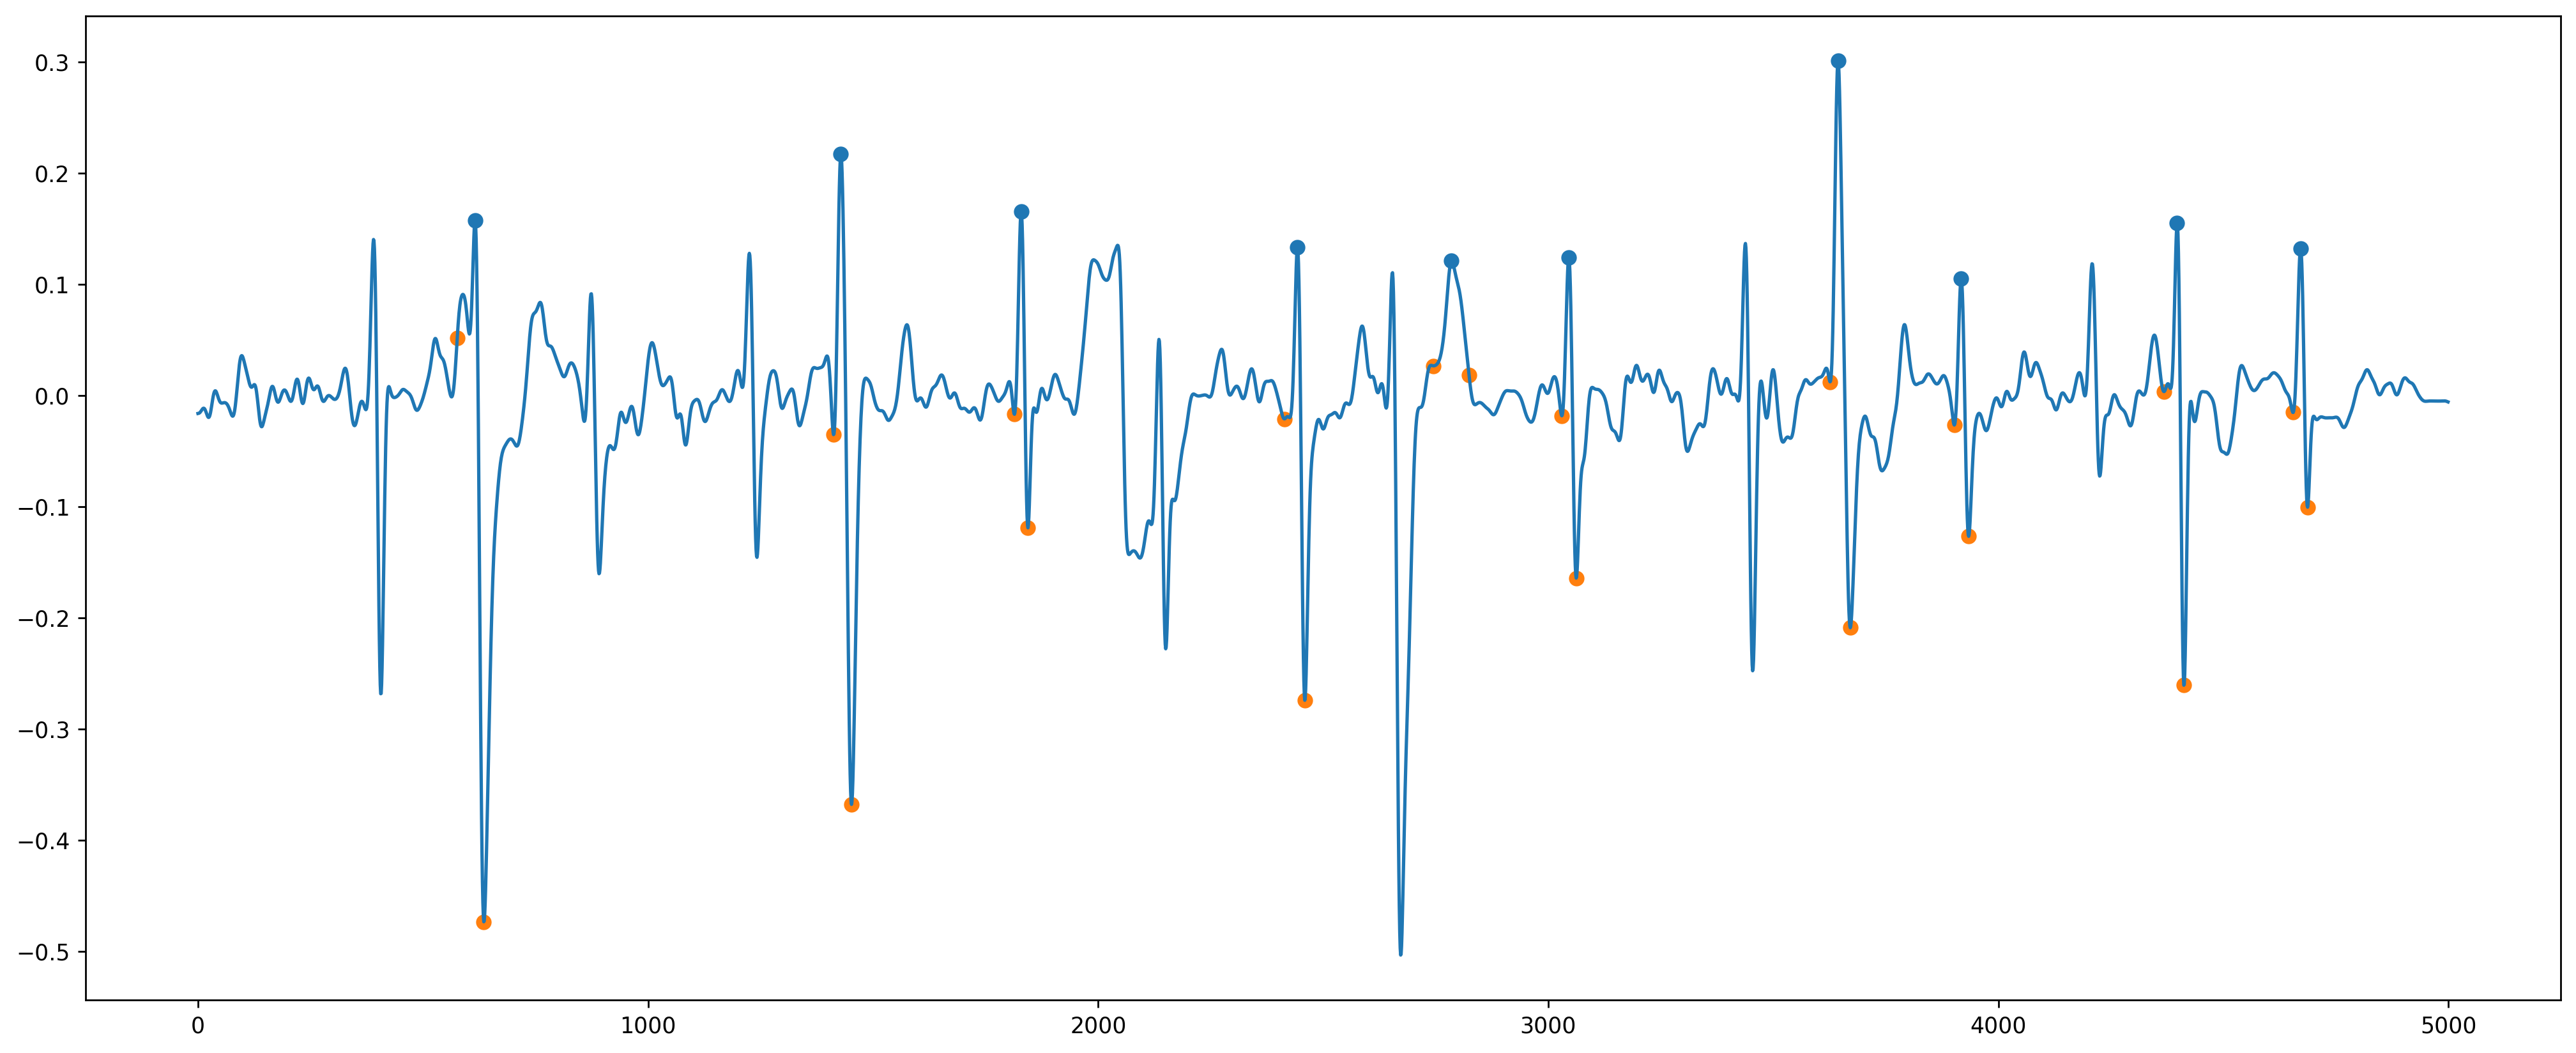

In [5]:
b = get_denoise_ecg(ecg, 8149, 0)
peaks, _ = sig.find_peaks(b, height=0.1, distance=250)
print(peaks)

mins_try = []

for R_peak_i in peaks:
    #print(R_peak_i)
    left_interval  = b[R_peak_i-40 : R_peak_i]
    print(left_interval)
    right_interval = b[R_peak_i : R_peak_i+40]
    
    mins_try.append(R_peak_i - 40 + (list(left_interval).index(min(left_interval))) )
    mins_try.append(R_peak_i + (list(right_interval).index(min(right_interval))) )
    
plt.figure(figsize = (20,8), dpi = 250)
plt.plot(b)
plt.scatter(peaks, b[peaks])
plt.scatter(mins_try, b[mins_try])
plt.show()

In [ ]:
# Calculate moving average with 0.75s in both directions, then append to dataset
hrw = 0.75  # One-sided window size, as proportion of the sampling frequency
fs  = 500   # The example dataset was recorded at 100Hz

mov_avg = dataset['lead1'].rolling(int(hrw*fs)).mean() #計算移動平均
avg_hr  = (np.mean(dataset.lead1))
mov_avg = [avg_hr if math.isnan(x) else x for x in mov_avg]
mov_avg = [x*1.5 for x in mov_avg] 

# 將平均值提高 20% 以防止繼發性心臟收縮受到干擾，在第 2 部分中，我們將動態執行此操作
dataset['hart_rollingmean'] = mov_avg

# Regions of Interest (ROI)
# 標記 ROI 並找出最高點
window   = [] # 記錄每一輪 ROI 範圍
peaklist = [] # 紀錄最高點位置
listpos  = 0  # 用一個計數器來移動不同的數據列

for datapoint in dataset.lead1:
    rollingmean = dataset.hart_rollingmean[listpos]
    if (datapoint < rollingmean) and (len(window) <= 1): 
    #未檢測到R-complex activity(因為len(window) < 1，所以目前沒有要檢查的ROI)
        listpos += 1
    elif (datapoint > rollingmean): #信號在平均之上，標記為ROI
        window.append(datapoint)
        listpos += 1
    else: # 當信號將要掉到平均之下且等於平均的那一刻，回頭去找 ROI 範圍中最高的一點
        maximum = max(window)
        beatposition = listpos - len(window) + (window.index(max(window))) 
        # 標記 peak 的位置
        peaklist.append(beatposition) 
        window = [] # 重置 window
        listpos += 1

ybeat = [dataset.lead1[x] for x in peaklist] 
# peaklist只是最高點在x軸上的位置，還要找出最高點在y軸上的值

plt.figure(figsize = (20,8), dpi = 250)
plt.title("Detected peaks in signal")
plt.xlim(0,5000)
plt.plot(dataset.lead1, color='blue') # 原資料
plt.plot(mov_avg, color='green')                # 移動平均線
plt.scatter(peaklist, ybeat, color='red')        # peaks
plt.show()

In [ ]:
def extract_ecg_features(ecg_lead, sampling_rate):
    """
    Processes an ECG lead, identifies, and returns the indices of P, Q, R, S, T points.
    
    Parameters:
    ecg_lead (numpy array): The ECG lead data.
    sampling_rate (int): The sampling rate of the ECG data.
    
    Returns:
    dict: A dictionary containing lists of indices for P, Q, R, S, T waves.
    """
    # Process the ECG signal
    processed_ecg = nk.ecg_process(ecg_lead, sampling_rate=sampling_rate)
    
    # Delineate the ECG signal using both peak and contour methods
    _, waves_peak = nk.ecg_delineate(processed_ecg[0], processed_ecg[1], sampling_rate=sampling_rate, method="peak")
    _, waves_contour = nk.ecg_delineate(processed_ecg[0], processed_ecg[1], sampling_rate=sampling_rate, method="dwt")
    
    # Extract peaks using a safe method for potentially empty arrays
    p_peaks = np.atleast_1d(waves_peak.get('ECG_P_Peaks', np.array([])))
    q_peaks = np.atleast_1d(waves_peak.get('ECG_Q_Peaks', np.array([])))
    r_peaks = np.atleast_1d(waves_contour.get('ECG_R_Offsets', np.array([])))  # Using R offsets if R peaks are not directly available
    s_peaks = np.atleast_1d(waves_peak.get('ECG_S_Peaks', np.array([])))
    t_peaks = np.atleast_1d(waves_peak.get('ECG_T_Peaks', np.array([])))
    
    # Storing the indices
    p_indices = np.where(p_peaks == 1)[0]
    q_indices = np.where(q_peaks == 1)[0]
    r_indices = np.where(r_peaks == 1)[0]  # Check if this mapping is adequate for your needs
    s_indices = np.where(s_peaks == 1)[0]
    t_indices = np.where(t_peaks == 1)[0]
    # Plot the ECG with annotations
    plt.figure(figsize = (20,8), dpi = 250)
    nk.ecg_plot(processed_ecg[0])
    print(processed_ecg[1]['ECG_R_Peaks'])
    # Highlight the waves
    for wave_indices, color, label in zip([p_indices, q_indices, r_indices, s_indices, t_indices], 
                                          ['green', 'red', 'blue', 'purple', 'orange'], 
                                          ['P', 'Q', 'R', 'S', 'T']):
        if wave_indices.size > 0:
            plt.scatter(wave_indices, ecg_lead[wave_indices], color=color, label=f"{label} peaks", zorder=3)
    
    plt.legend()
    plt.title('ECG Signal with PQRST Points')
    plt.show()
    
    return {
        "P": processed_ecg[1]['ECG_P_Peaks'],
        "Q": processed_ecg[1]['ECG_Q_Peaks'],
        "R": processed_ecg[1]['ECG_R_Peaks'],
        "S": processed_ecg[1]['ECG_S_Peaks'],
        "T": processed_ecg[1]['ECG_T_Peaks']
    }

# Example usage
# You need to provide the 'ecg_lead' as a numpy array and 'sampling_rate' as an integer
# ecg_features = extract_ecg_features(your_ecg_lead_data, your_sampling_rate)

sig_denoised = get_denoise_ecg(ecg, 5678, 0)
feature = extract_ecg_features(sig_denoised, 500)
P_peaks = feature['P']
Q_peaks = feature['Q']
R_peaks = feature['R']
S_peaks = feature['S']
T_peaks = feature['T']

def remove_nans(peaks):
    """
    Removes NaNs from the list of peak indices.
    
    Parameters:
    peaks (list): List of peak indices.
    
    Returns:
    list: List of peak indices with NaNs removed.
    """
    return [int(peak) for peak in peaks if not np.isnan(peak)]

P_peaks = remove_nans(feature['P'])
Q_peaks = remove_nans(feature['Q'])
R_peaks = remove_nans(feature['R'])
S_peaks = remove_nans(feature['S'])
T_peaks = remove_nans(feature['T'])

# %%
plt.figure(figsize = (20,8), dpi = 250)
plt.plot(sig_denoised, label='Denoised ECG')

# 使用不同颜色标注PQRST波峰
plt.scatter(P_peaks, sig_denoised[P_peaks], color='green', label='P peaks')
plt.scatter(Q_peaks, sig_denoised[Q_peaks], color='red', label='Q peaks')
plt.scatter(R_peaks, sig_denoised[R_peaks], color='blue', label='R peaks')
plt.scatter(S_peaks, sig_denoised[S_peaks], color='purple', label='S peaks')
plt.scatter(T_peaks, sig_denoised[T_peaks], color='orange', label='T peaks')

plt.legend()
plt.title('Denoised ECG with PQRST Peaks')
plt.show()